In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
save_dir = './Desktop/Insight Project/trimmed_data_and_plots/'

In [2]:
def read_csv_sort(producename, cityname):
    input_data = pd.read_csv('./Desktop/Insight Project/Data/Price_index_2016-2019.csv')
    
    dateparse0 = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]
    input_data.index = input_data["Record Date"]
    del input_data["Record Date"]
    
    # This now sorts in date order
    # https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date
    input_data = input_data.sort_values(by='Record Date')
    
    # Date will become a normal column and you can rename it.
    input_data = input_data.reset_index()
    
    # Date to Index
    input_data.index = input_data["Record Date"]
    del input_data["Record Date"]
    
    # Rename retail price
    input_data = input_data.rename(columns = {cityname: 'Retail Price'})
    
    # Evaluate Price spread : (retail_price - farm_price)/retail_price*100
    # This presents how much the price spread account for retail price in percentage
    # and add the value as a column
    input_data = pd.concat([input_data, ((input_data['Retail Price'] - input_data['Farm Price'])/input_data['Retail Price']*100.).rename('Price Spread')], axis=1)
    
    output_data = input_data.loc[ (input_data["Commodity"]==producename) ,['Farm Price','Retail Price','Price Spread']]
    
    return output_data

In [3]:
# Test def read_csv_sort
read_csv_sort('Strawberries','Los Angeles Retail')

Farm Price  Retail Price  Price Spread
Record Date                                        
2016-01-03         2.63          4.12     36.165049
2016-01-10         2.63          4.16     36.778846
2016-01-17         2.75          3.32     17.168675
2016-01-24         2.88          4.49     35.857461
2016-01-31         3.00          4.74     36.708861
2016-02-14         2.00          3.27     38.837920
2016-02-21         1.75          2.61     32.950192
2016-02-28         1.00          3.37     70.326409
2016-03-06         1.09          2.87     62.020906
2016-03-13         1.38          2.69     48.698885
2016-03-20         1.25          2.25     44.444444
2016-03-27         1.25          2.62     52.290076
2016-04-03         1.33          3.25     59.076923
2016-04-10         1.42          2.61     45.593870
2016-04-17         1.65          2.49     33.734940
2016-04-24         1.69          2.50     32.400000
2016-05-01         1.42          2.74     48.175182
2016-05-08         1.00          2.87     65.156794
2016-05-15         1.04          2.87     63.763066
2016-05-22         1.13          3.00     62.333333
2016-05-29         1.19          2.62     54.580153
2016-06-05         1.16          2.62     55.725191
2016-06-12         1.09          2.50     56.400000
2016-07-03         0.97          2.43     60.082305
2016-07-10         1.00          2.37     57.805907
2016-07-17         1.13          2.31     51.082251
2016-07-24         1.16          2.50     53.600000
2016-07-31         1.13          2.62     56.870229
2016-08-07         1.31          2.87     54.355401
2016-08-14         1.44          2.62     45.038168
...                 ...           ...           ...
2018-10-21         1.19          3.12     61.858974
2018-10-28         1.10          3.24     66.049383
2018-11-04         1.06          3.74     71.657754
2018-11-11         2.17          3.74     41.978610
2018-11-18         2.08          3.99     47.869674
2018-11-25         2.69          3.99     32.581454
2018-12-02         2.88          3.99     27.819549
2018-12-09         3.25          3.99     18.546366
2018-12-16         3.06          4.99     38.677355
2018-12-23         2.88          4.99     42.284569
2018-12-30         2.50          4.49     44.320713
2019-01-06         2.63          4.24     37.971698
2019-01-13         2.50          4.99     49.899800
2019-01-20         2.63          2.95     10.847458
2019-01-27         2.63          3.49     24.641834
2019-02-10         2.25          3.96     43.181818
2019-02-17         1.63          4.12     60.436893
2019-02-24         1.75          2.99     41.471572
2019-03-03         1.88          2.99     37.123746
2019-03-10         1.88          2.75     31.636364
2019-03-17         1.88          2.32     18.965517
2019-03-24         1.81          3.12     41.987179
2019-03-31         1.81          2.87     36.933798
2019-03-31         1.81          2.87     36.933798
2019-04-07         1.08          2.62     58.778626
2019-04-07         1.08          2.62     58.778626
2019-04-28         0.58          2.38     75.630252
2019-05-05         0.58          2.12     72.641509
2019-05-12         0.91          2.47     63.157895
2019-05-19         1.16          1.99     41.708543

[169 rows x 3 columns]

In [4]:
pd.to_datetime(read_csv_sort('Strawberries','Los Angeles Retail').index)

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-14', '2016-02-21', '2016-02-28',
               '2016-03-06', '2016-03-13',
               ...
               '2019-03-17', '2019-03-24', '2019-03-31', '2019-03-31',
               '2019-04-07', '2019-04-07', '2019-04-28', '2019-05-05',
               '2019-05-12', '2019-05-19'],
              dtype='datetime64[ns]', name='Record Date', length=169, freq=None)

In [36]:
def plot_save_produce(producedata, producename, cityname):
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)

    datelist = pd.to_datetime(producedata.index)
    plt.plot_date(datelist, producedata['Retail Price'], '-o')
    plt.plot_date(datelist, producedata['Farm Price'],'-o')
    
    graphtitle = producename + '_' + cityname
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($ per unit)', fontsize=14)
    plt.title(graphtitle)
    plt.legend(loc='best')
    
    filetitle = producename + '_' + cityname
    plt.savefig(save_dir+filetitle+'.png', format='png', bbox_inches='tight')
    
    return plt.figure()

In [6]:
# Test def plot_save_produce
#producedata_test = read_csv_sort('Strawberries','Los Angeles Retail')
#plot_save_produce(producedata_test,'Strawberries','Los Angeles Retail')

In [7]:
def plot_save_spread(cityname, producelist):
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.figure(figsize=(15,15))
    plt.xticks(rotation=45)
    
    for p in producelist:
        input_data = read_csv_sort(p, cityname)
        datelist = pd.to_datetime(input_data.index)
        plt.plot_date(datelist, input_data['Price Spread'], '-o', label = p)
    
    graphtitle = cityname
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price Spread (%)', fontsize=14)
    plt.title(graphtitle)
    plt.legend(loc='best')
    
    filetitle = 'price_spread_' + cityname
    plt.savefig(save_dir+filetitle+'.png', format='png', bbox_inches='tight')

In [8]:
cities = ['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail']
#cities = ['New York Retail']
commodities = ['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes', 'Oranges', 'Iceberg Lettuce', 'Green Leaf Lettuce', 'Celery', 'Cauliflower', 'Carrots', 'Cantaloupe', 'Broccoli Crowns', 'Broccoli Bunches', 'Avocados']
commo1 = ['Strawberries', 'Potatoes', 'Oranges', 'Carrots', 'Cantaloupe' , 'Avocados']
commo2 = ['Romaine Lettuce', 'Red Leaf Lettuce', 'Iceberg Lettuce', 'Green Leaf Lettuce', 'Celery', 'Cauliflower', 'Broccoli Crowns', 'Broccoli Bunches']
commodities_reduced = ['Strawberries', 'Romaine Lettuce', 'Potatoes', 'Oranges', 'Celery', 'Cauliflower', 'Carrots', 'Cantaloupe', 'Broccoli Crowns', 'Avocados']

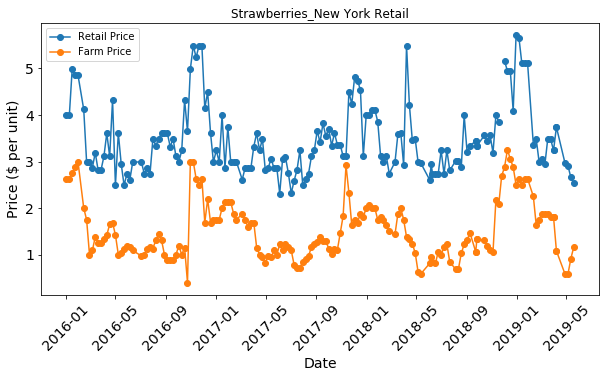

<Figure size 432x288 with 0 Axes>

In [37]:
test_data = read_csv_sort('Strawberries', 'New York Retail')
fig_plot_save_produce = plot_save_produce(test_data, 'Strawberries', 'New York Retail')

In [39]:
?fig_plot_save_produce

C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\hyung\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

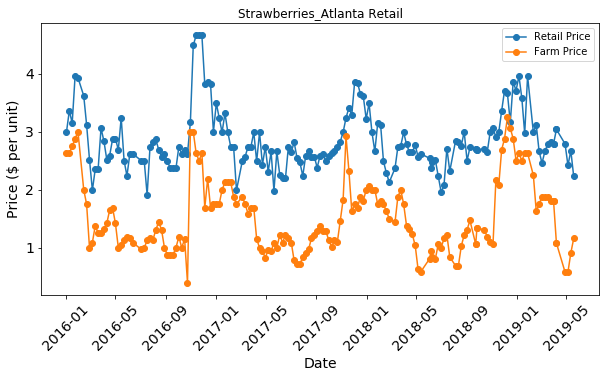

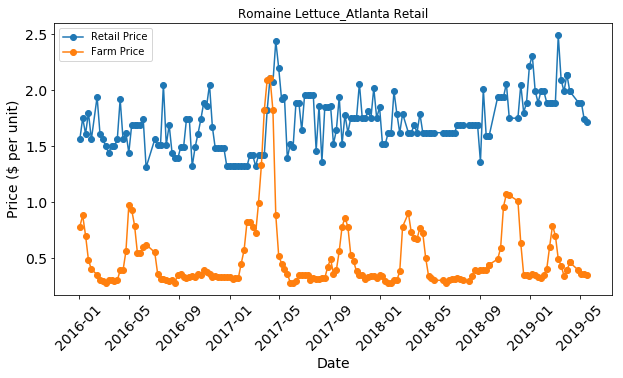

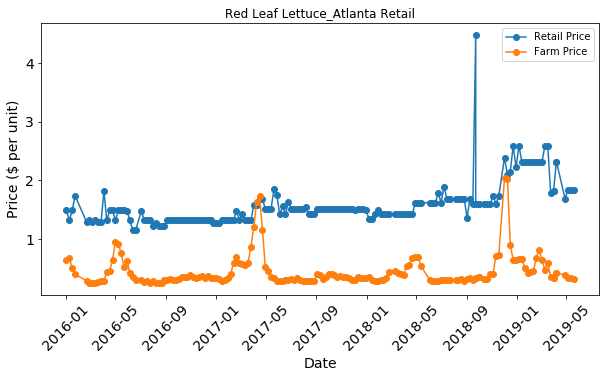

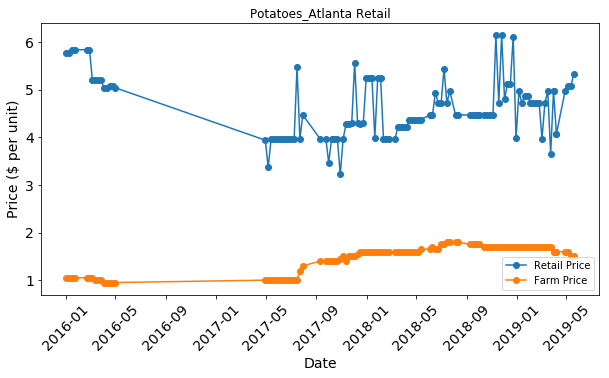

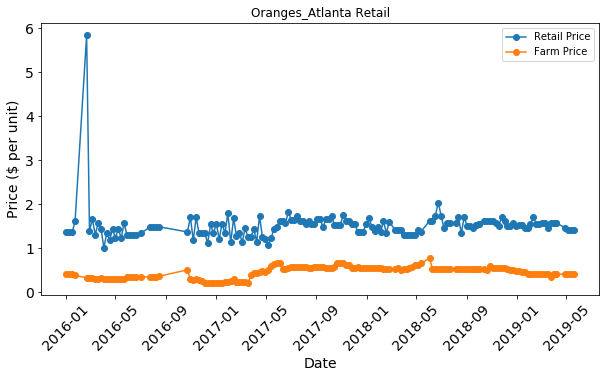

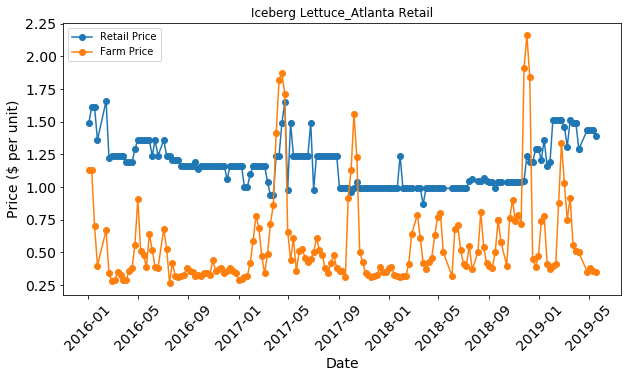

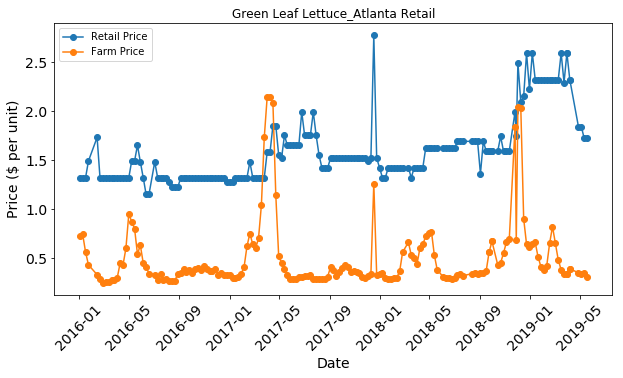

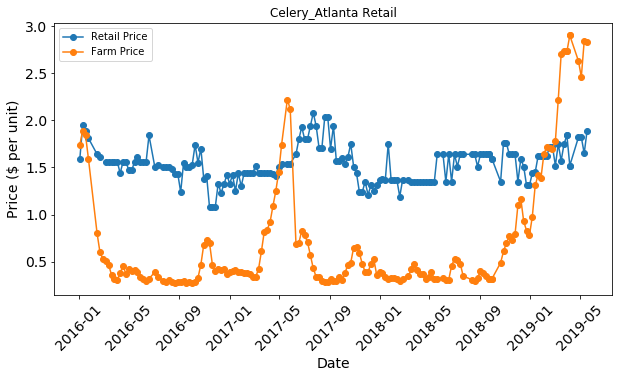

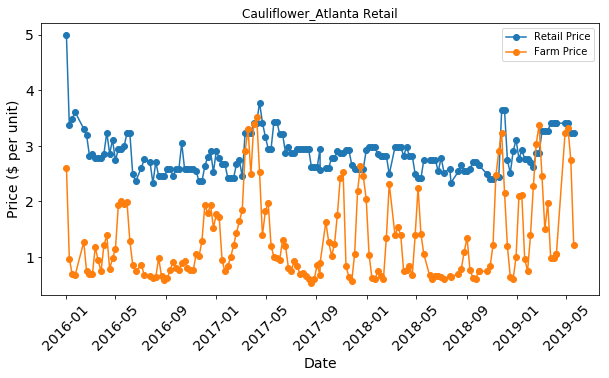

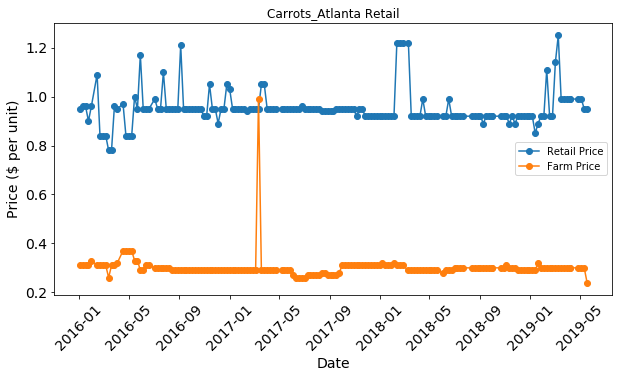

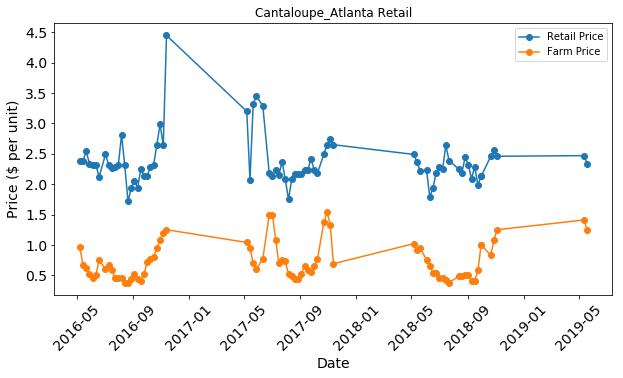

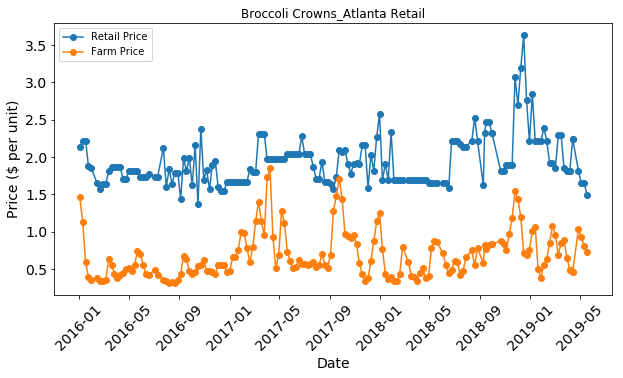

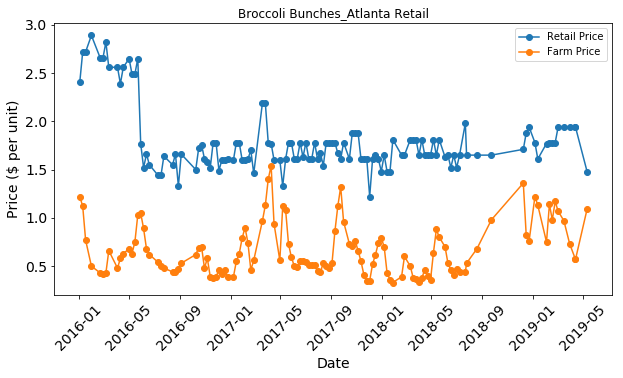

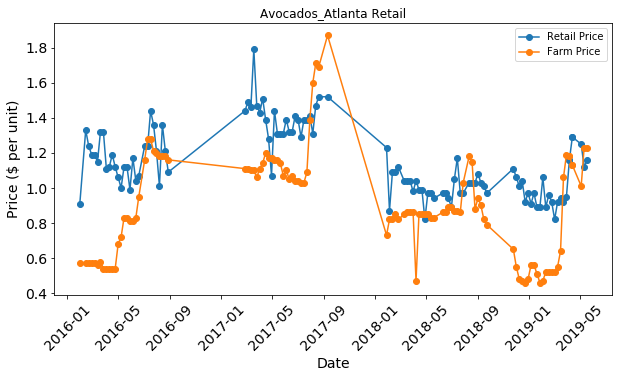

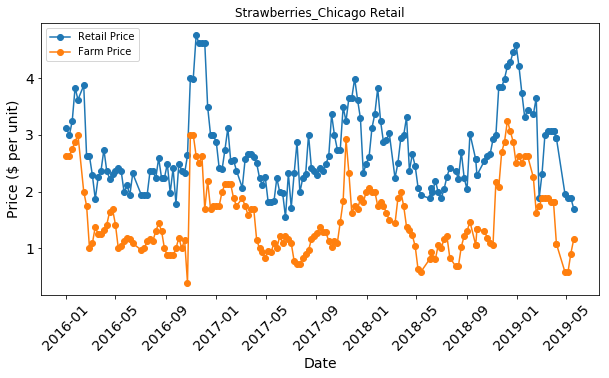

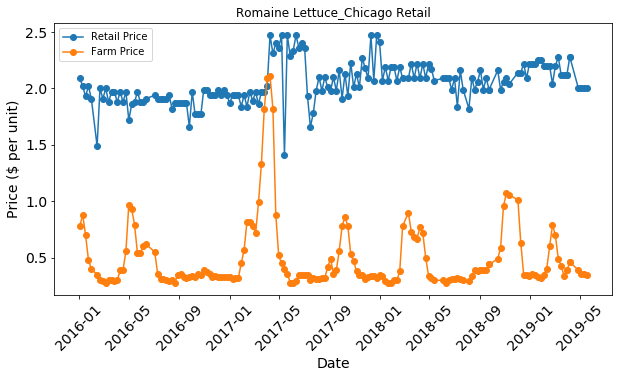

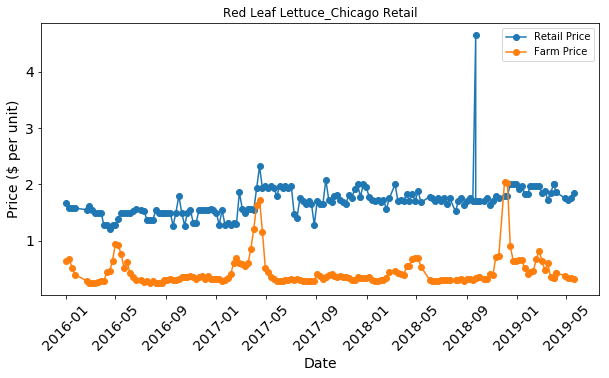

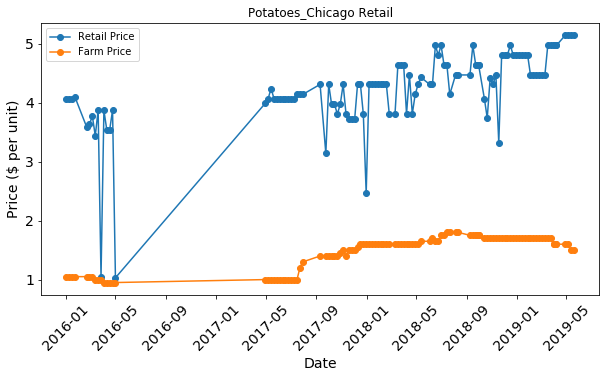

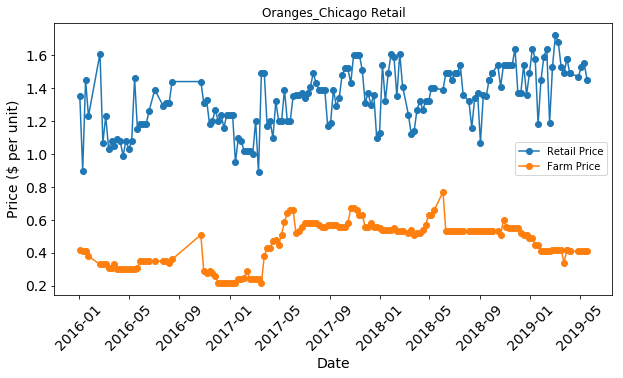

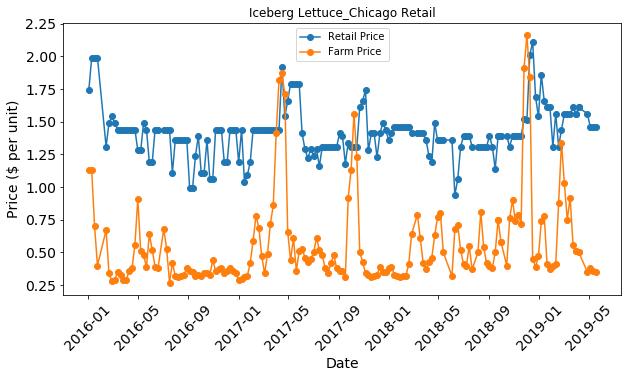

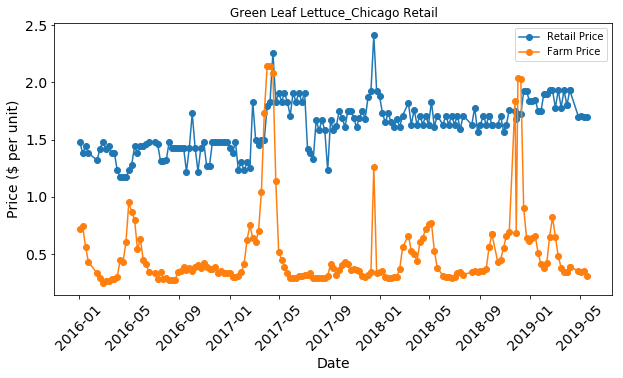

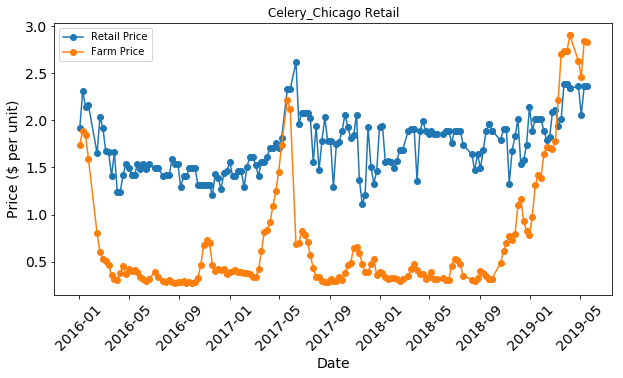

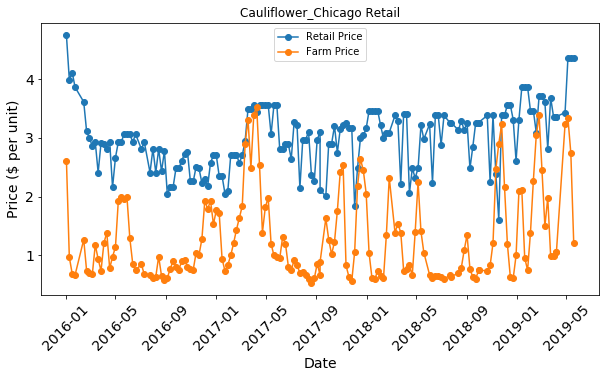

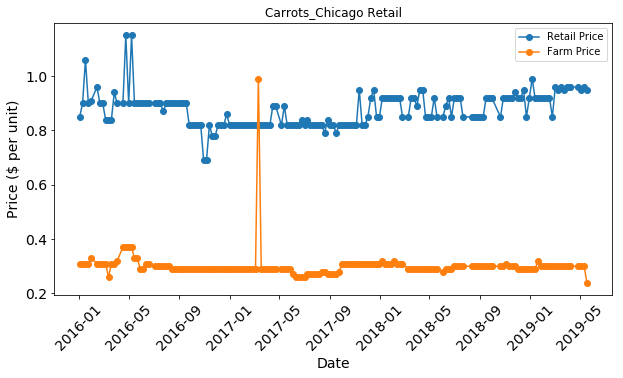

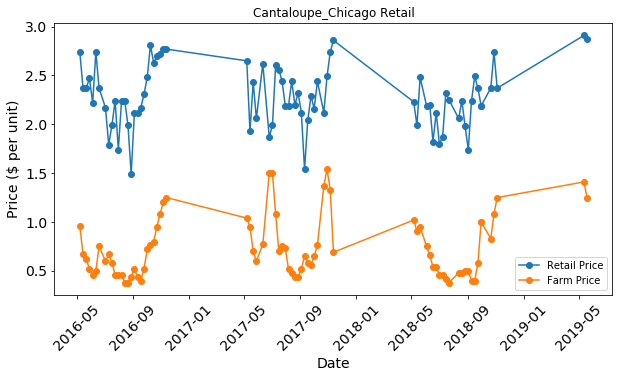

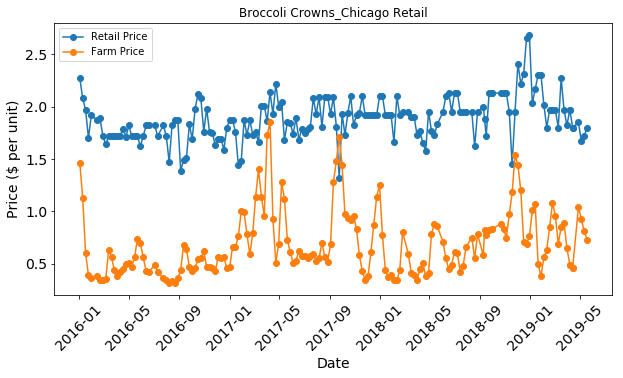

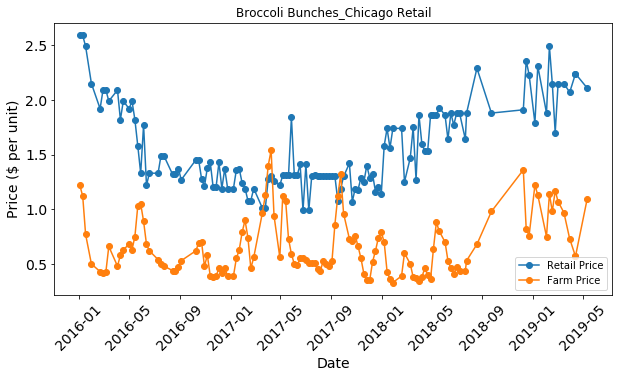

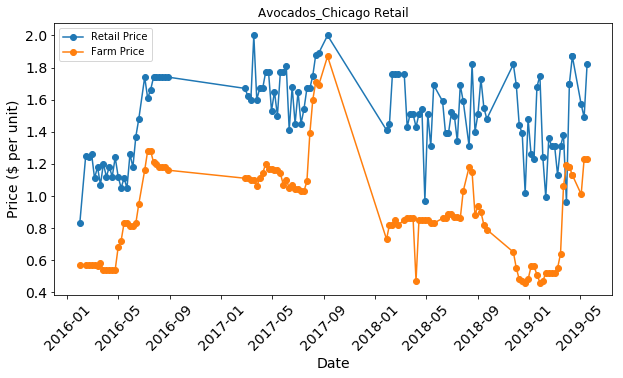

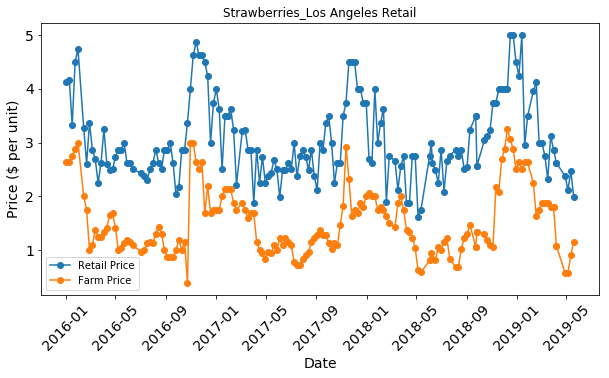

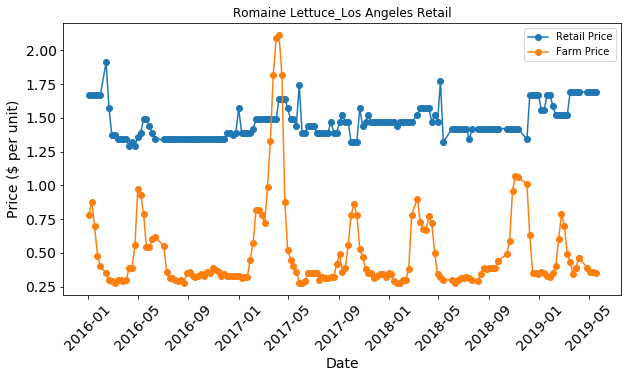

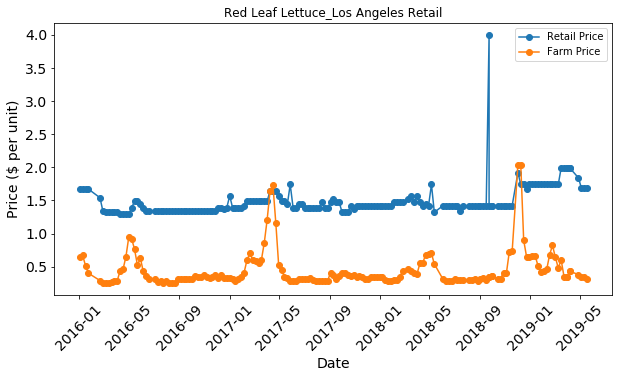

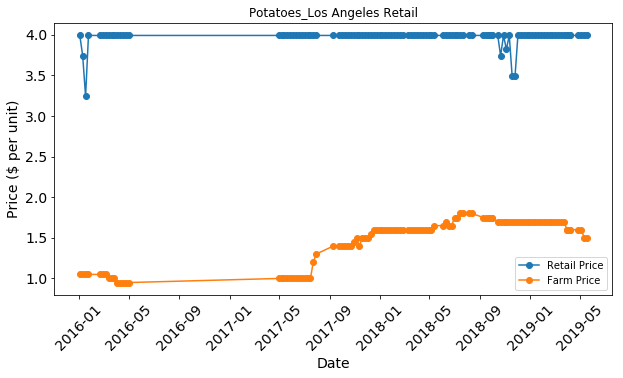

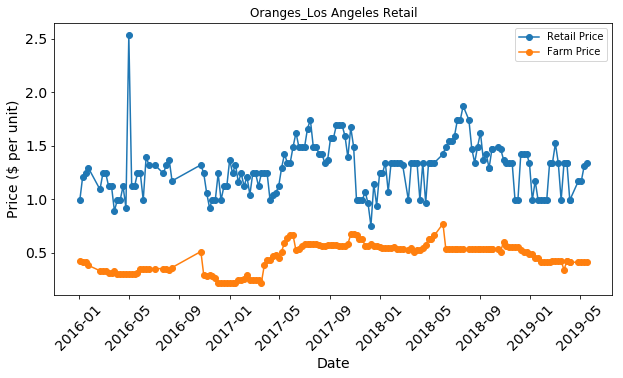

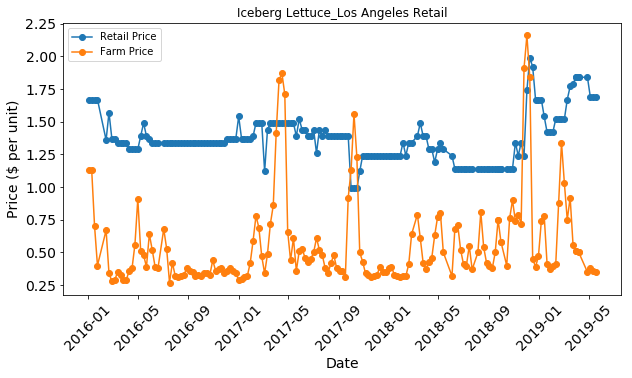

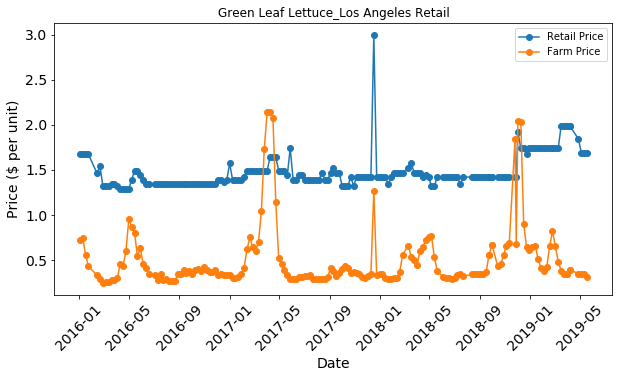

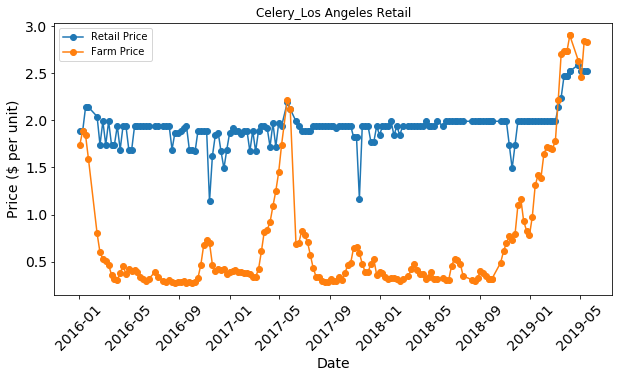

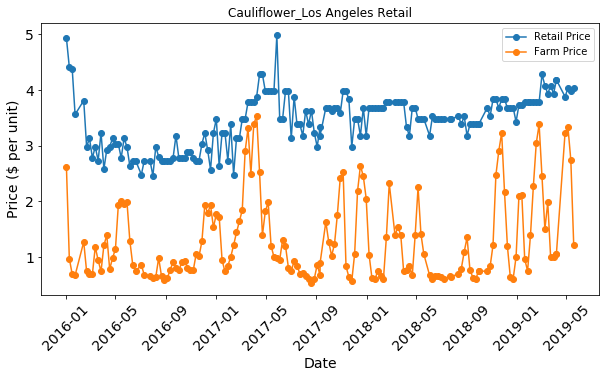

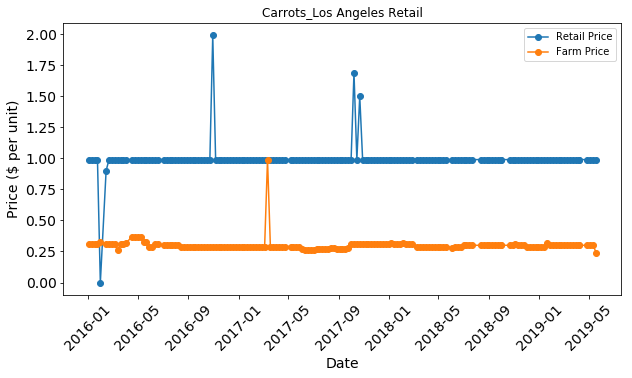

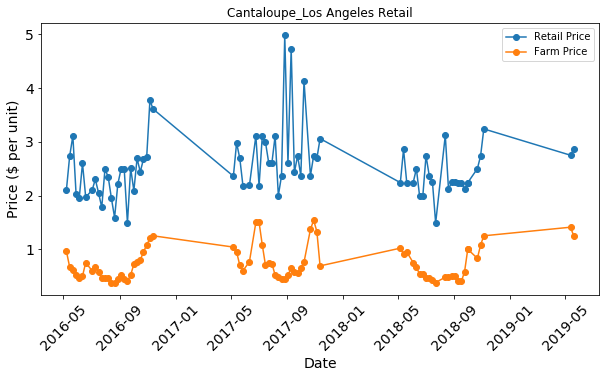

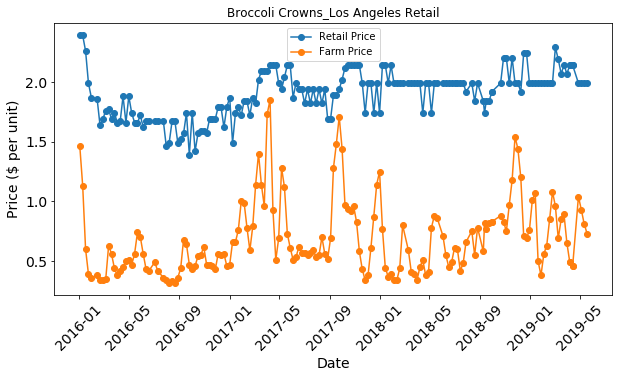

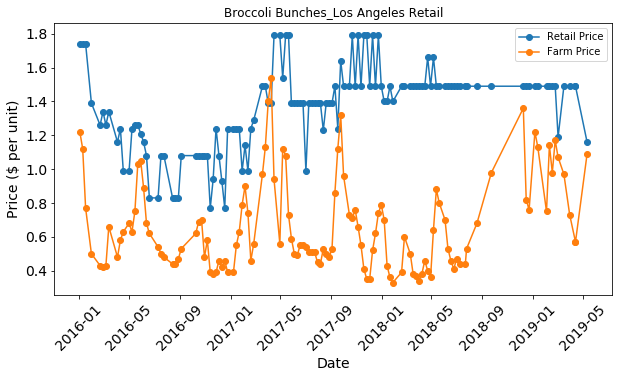

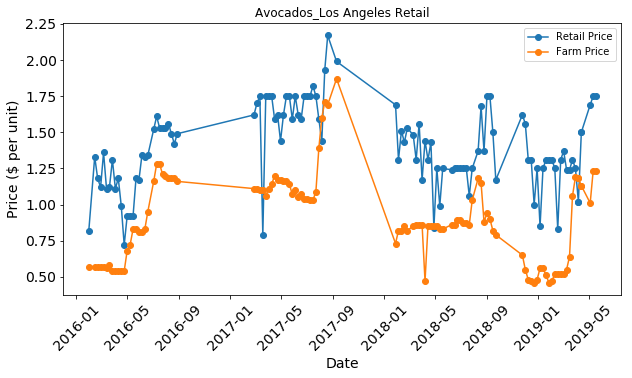

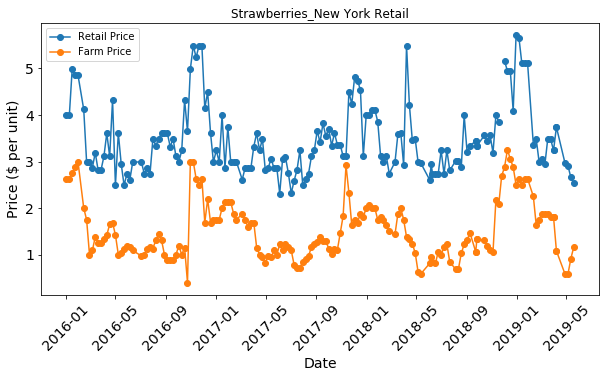

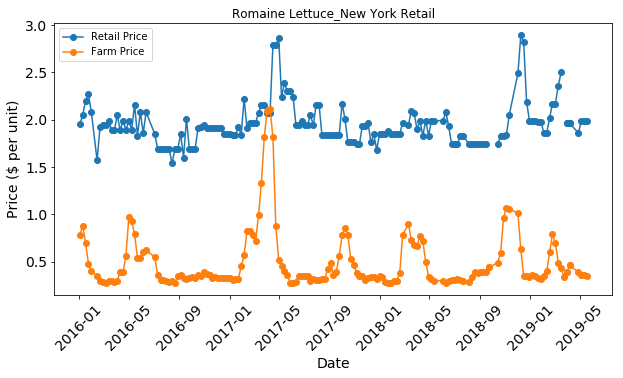

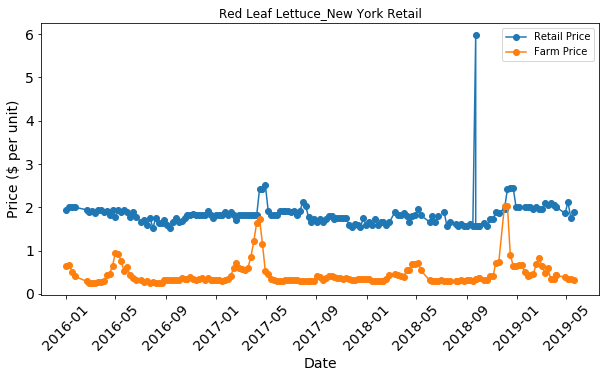

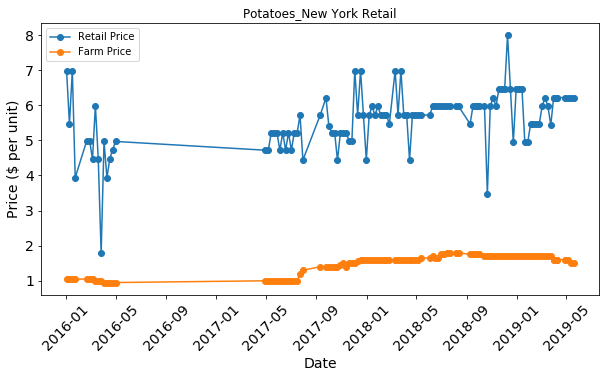

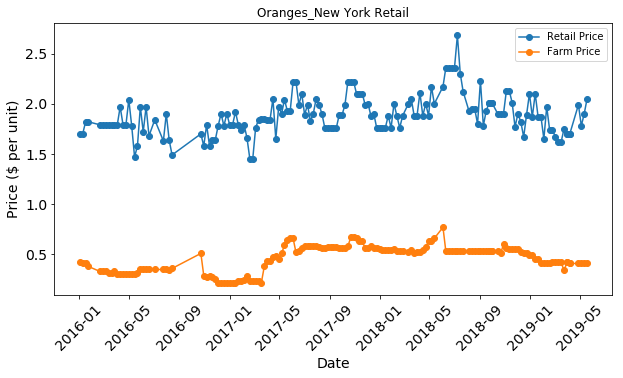

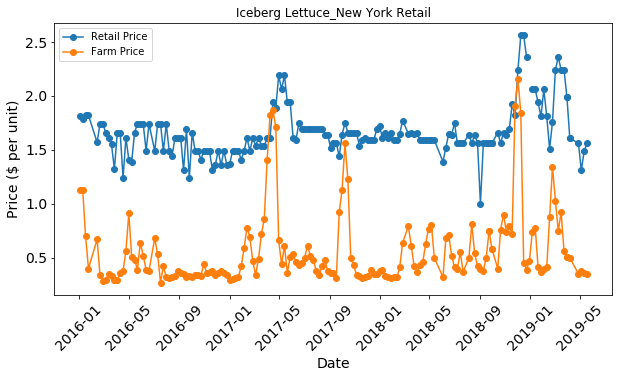

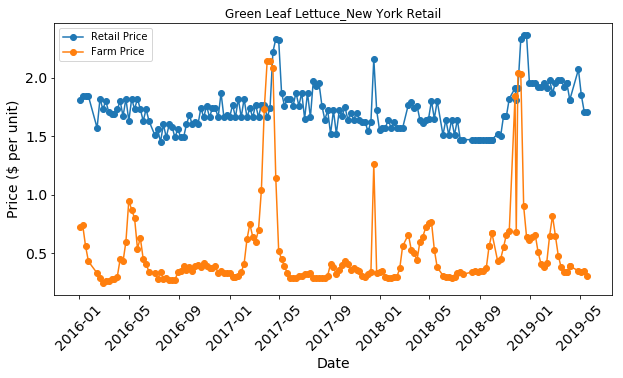

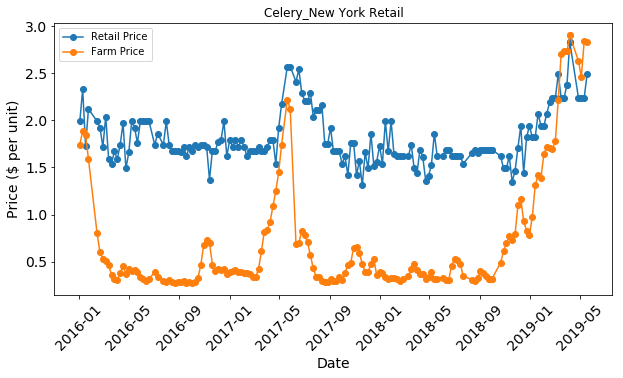

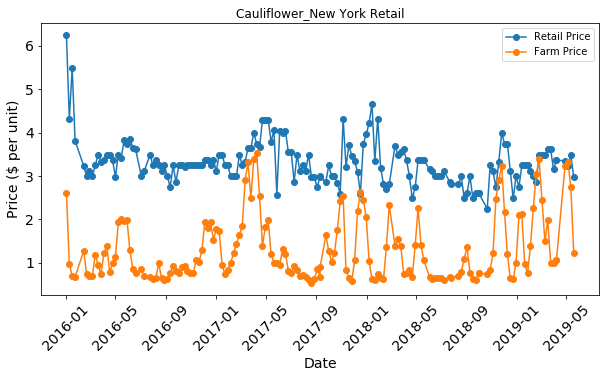

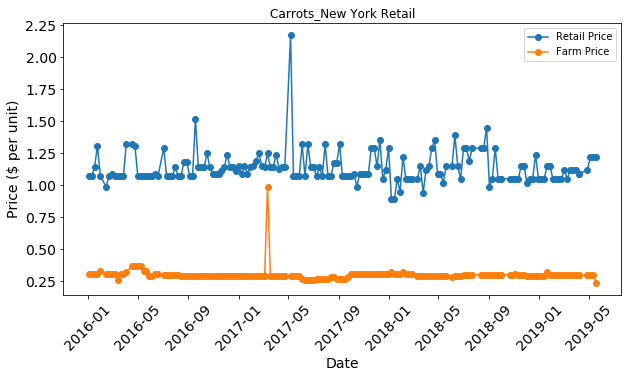

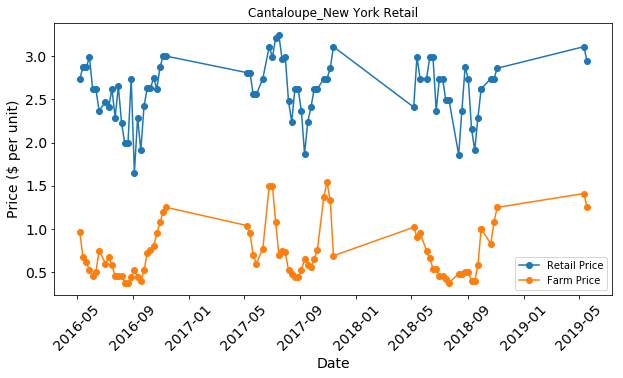

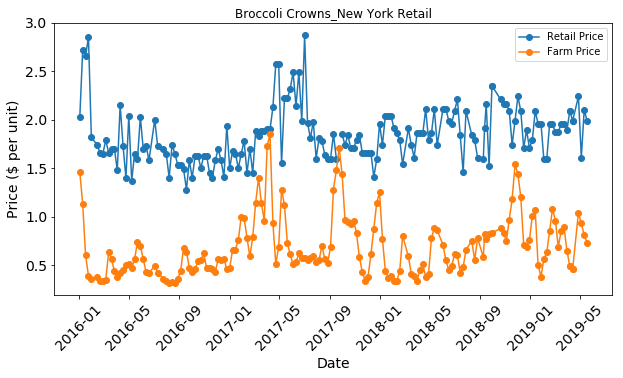

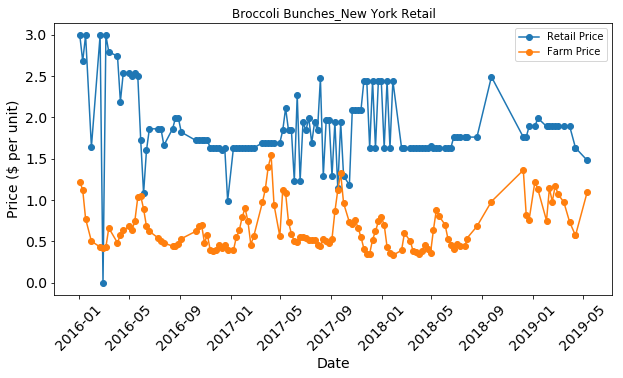

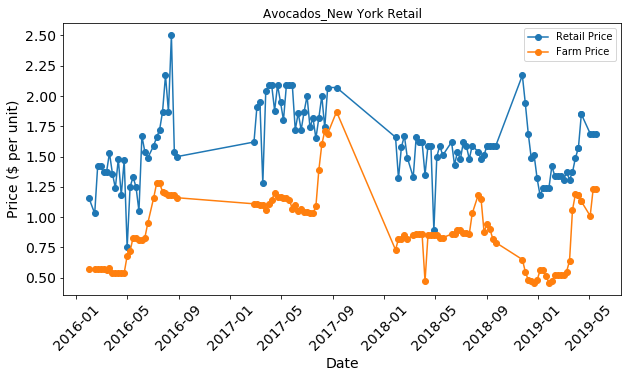

In [30]:
# loop over cities, commodities
for c in cities:
    for v in commodities:
        test_data = read_csv_sort(v, c)
        plot_save_produce(test_data, v, c)

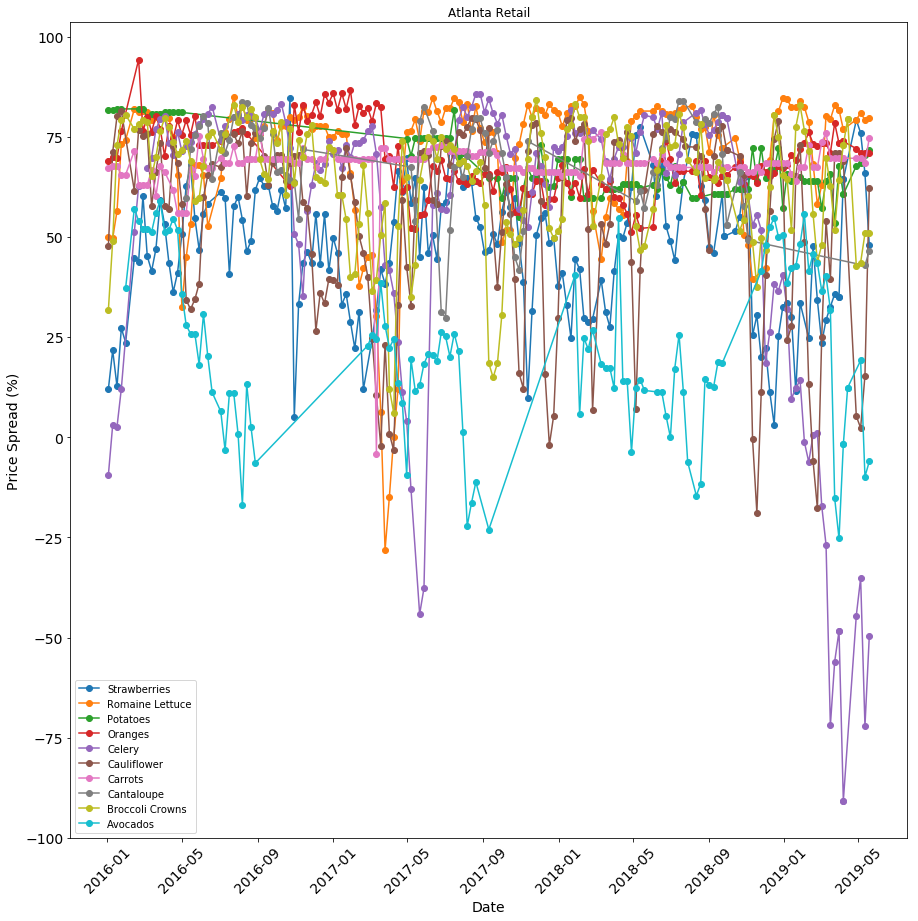

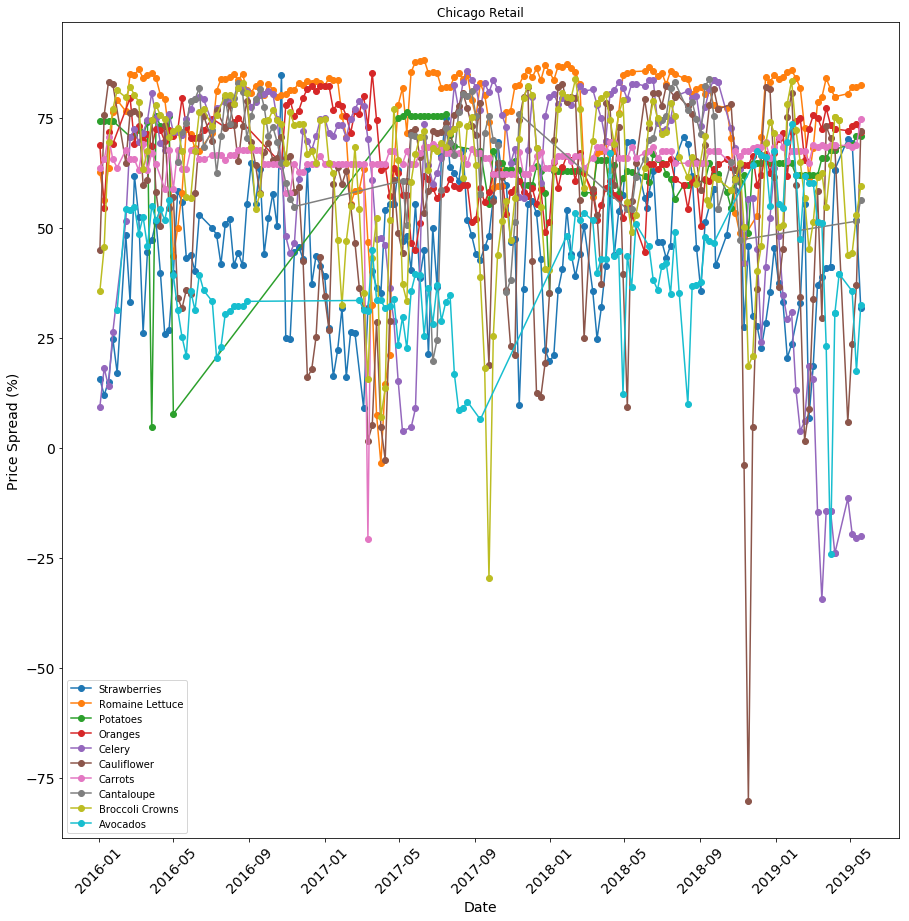

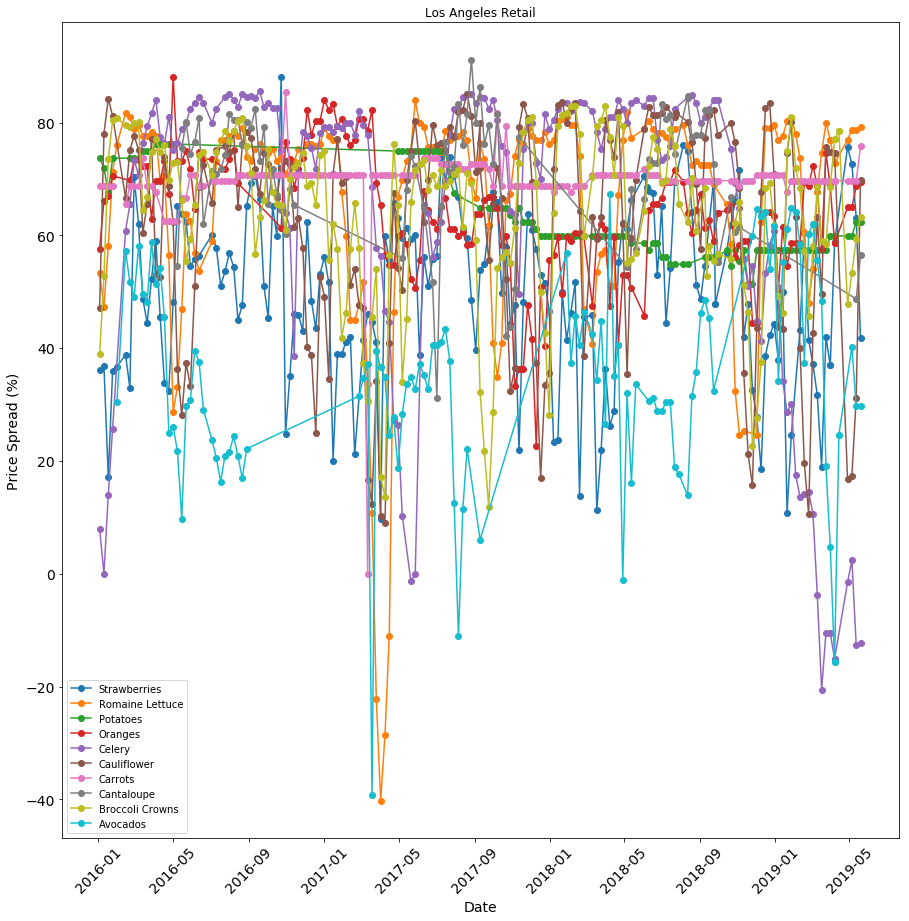

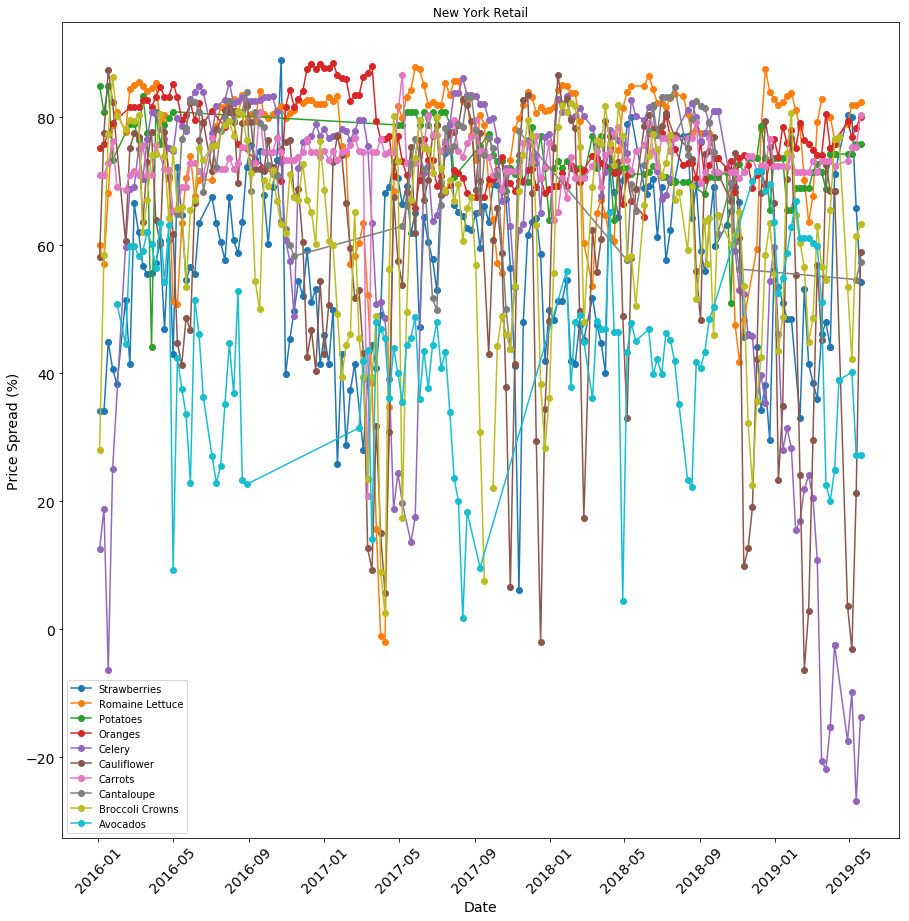

In [53]:
# loop over cities
for c in cities:
#        plot_save_spread(c, commo1)
#        plot_save_spread(c, commo2)
        plot_save_spread(c, commodities_reduced)